# Introduction

For this project I would like to know what are the major factors assoociated with predicting an individuals medical insurance costs. Medical insurance is very important for nearly everyone so the purpose of my analying this dataset is to provid people with a better understanding of the costs assocated with medical insurance. Within this project I plan on appling multiple regression analysis to predict the cost of insurance based on demographic and lifestyle attributes such as age, BMI, smoking status, and region. The main goal is to explore how each of these variables impacts insurance charges and to build models that can accurately estimate an individual’s expected medical insurance cost.

# Main Questions 

- What factors in a persons life can influence an individual’s medical insurance cost the most?
- What ethical or social implications can come from predicting insurance costs based on personal data?
- How well can we actually accurately predict a person’s medical insurance cost using regression models?
- what regrssion model would be best for predicting this type of dataset (???)

# What is regression and how does it work?

Regression is a type of way to predict a continuous value, like insurance costs, based on other related factors. It works by finding a line or pattern that best fits the data and shows how changes in one variable affect the result. For my project, I used regression to predict a person’s medical insurance charges using features such as age, BMI, number of children, sex, smoking status, and region. I plan on using regression by testing the model’s accuracy using R^2 and going to try multiple experiments, such as adding new features and using ridge regression to improve results. Overall, I am going to use regression to help me predict if factors like smoking and age have the biggest effect on predicting insurance charges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
table1 = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\datasets\insurance.csv")

In [3]:
table1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Pre-processing Data

For pre-processing the data I changed text values like “male” and “female” or “yes” and “no” into numbers to amke it easier to understand, created new columns for each region to better balance out all the factors, and then scaled the data so all features were on a similar range. I did this to make it easier for the regression model to learn and make accurate predictions.

In [ ]:
table1['sex'] = table1['sex'].map({'male': 1, 'female': 0})
table1['smoker'] = table1['smoker'].map({'yes': 1, 'no': 0})

table1 = pd.get_dummies(table1, columns=['region'], drop_first=True)

X = table1.drop('charges', axis=1) 
y = table1['charges']              

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
table1.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


# Introducing The Data

Age: How old the insured individual is

Sex: If the individual is male of female

BMI: The individuals body fat based on height and weight

Childern: The amount childern the insured individual has

Smoker: If the individual is a smoker or not

Charges: The total medical insurance cost billed to the customer

Region_Northwest: The individual lives in the Northwest part of the U.S

Region_SoutEast: The individual lives in the SouthEast part of the U.S

Region_SouthWest: The individual lives in the SouthWest part of the U.S

In [33]:
table1.describe

<bound method NDFrame.describe of       age  sex     bmi  children  smoker      charges  region_northwest  \
0      19    0  27.900         0       1  16884.92400             False   
1      18    1  33.770         1       0   1725.55230             False   
2      28    1  33.000         3       0   4449.46200             False   
3      33    1  22.705         0       0  21984.47061              True   
4      32    1  28.880         0       0   3866.85520              True   
...   ...  ...     ...       ...     ...          ...               ...   
1333   50    1  30.970         3       0  10600.54830              True   
1334   18    0  31.920         0       0   2205.98080             False   
1335   18    0  36.850         0       0   1629.83350             False   
1336   21    0  25.800         0       0   2007.94500             False   
1337   61    0  29.070         0       1  29141.36030              True   

      region_southeast  region_southwest  bmi_squared  
0        

# Visual 1: Bar Chart

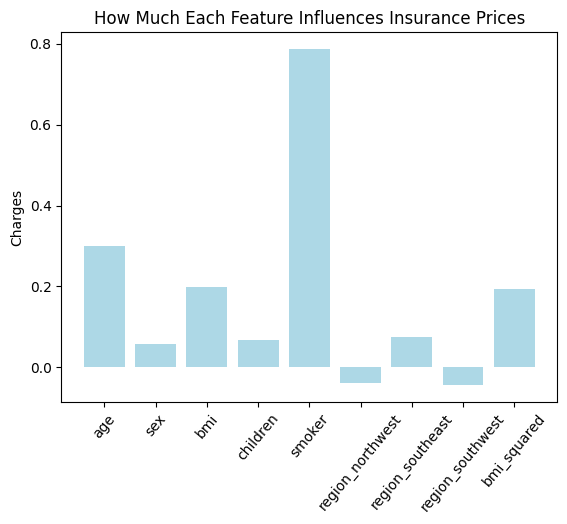

In [ ]:
charges = table1.corr()['charges'].drop('charges') 
plt.bar(charges.index, charges.values, color='lightblue')
plt.title('How Much Each Feature Influences Insurance Prices')
plt.ylabel('Charges')
plt.xticks(rotation=50)
plt.show()

In this visual I wanted to create a bar chart to help answer the questions "answers What factors in a person’s life can influence medical insurance cost the most?". In this bar chart it shows all the factors that go into deciding an insurance price for a individual. From the outcome of this bar chart its shows smoking is the leading factor that decides an individuals insurance price.  

# Visual 2: Pie Chart

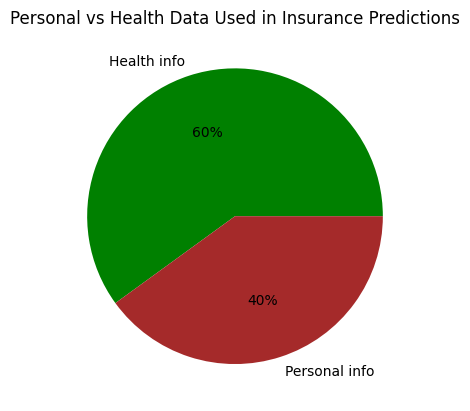

In [ ]:
labels = ['Health info', 'Personal info']
sizes = [60, 40]  
colors = ['green', 'brown']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%')
plt.title('Personal vs Health Data Used in Insurance Predictions')
plt.show()

In this visual I wanted to answer on of my main questions "What ethical or social issues can come from predicting insurance costs using personal data?". This visual explains that health infomation is used more in deciding an insurance price than personal information. 

# Experiment 1: Linear regression model

In [15]:
experiment1 = LinearRegression()
experiment1.fit(X_train_scaled, y_train)
y_pred1 = experiment1.predict(X_test_scaled)

rmse1 = np.sqrt(mean_squared_error(y_test, y_pred1))
r2 = r2_score(y_test, y_pred1)

print("Experiment 1: Linear regression model")
print(f"RMSE: {rmse1:.2f}")
print(f"R² Score: {r2:.2f}")


Experiment 1: Linear regression model
RMSE: 5796.28
R² Score: 0.78


In this experiment I was predicting a baseline of insurance costs. In my outcome I got 78% for my R^2 value. Overall this experiment shows that features like age, BMI, number of children, sex, smoking status, and region together have a strong impact on predicting insurance costs. This helps answer one of my main questions being, "what factors in a persons life can influence an individual’s medical insurance cost the most?".

# Experiment 2: Adding BMI^2 features

In [ ]:
table1['bmi_squared'] = table1['bmi'] ** 2

X2 = table1.drop('charges', axis=1)
y2 = table1['charges']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

model2 = LinearRegression()
model2.fit(X_train2_scaled, y_train2)

y_pred2 = model2.predict(X_test2_scaled)

rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_2 = r2_score(y_test2, y_pred2)

print("Experiment 2: Linear Regression with BMI²")
print(f"RMSE: {rmse2:.2f}")
print(f"R² Score: {r2_2:.2f}")


Experiment 2: Linear Regression with BMI²
RMSE: 5861.72
R² Score: 0.78


For this experiment I tested whether if BMI had a stronger nonlinear effect on insurance prices. This experiment helps answer "what factor in a persons life can influence insurance cost?". The outcome was the same for the R^2 value as the first experiment meaning that the adding BMI^2 does not improve the models accuracy, but it also doesn't make the model less accurate! 

# Experiment 3: Ridge Regression

In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train2_scaled, y_train2)
y_pred_ridge = ridge_model.predict(X_test2_scaled)

rmseRidge = np.sqrt(mean_squared_error(y_test2, y_pred_ridge))
r2Ridge = r2_score(y_test2, y_pred_ridge)
print("Experiment 3: Ridge Regression")
print(f"RMSE: {rmseRidge:.2f}")
print(f"R² Score: {r2Ridge:.2f}")


Experiment 3: Ridge Regression
RMSE: 5850.22
R² Score: 0.78


In the last experiment I used ridge regression to help make the results be more spread out by preventing one particle factor from dominating predictions unfairly. The outcome of this project is has the same R^2 value and a sightly lower RMSE number. Using this model it helps predicts the answer to one of my main questions "What ethical or social implications can come from predicting insurance costs based on personal data?". 

# Experiment Visual 

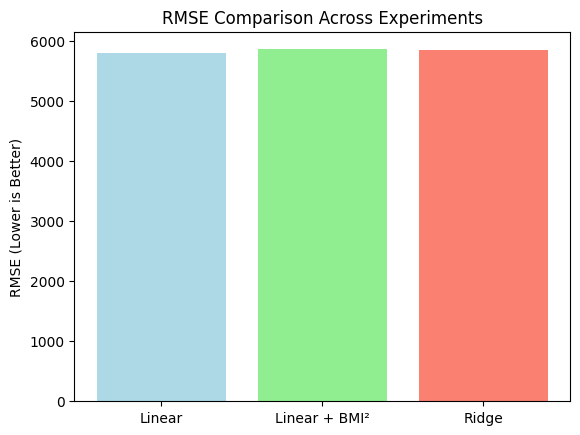

In [11]:
experiments = ['Linear', 'Linear + BMI²', 'Ridge']
rmse_values = [rmse1, rmse2, rmse_ridge]

plt.bar(experiments, rmse_values, color=['lightblue', 'lightgreen', 'salmon'])
plt.title('RMSE Comparison Across Experiments')
plt.ylabel('RMSE (Lower is Better)')
plt.show()

# Impact Section

The impact of this project is to help people evaluate and analyze their insurance costs, as well as to identify the factors that most influence these costs. This information is crucial because nearly everyone needs medical insurance, which can be quite expensive. It is important to acknowledge that my data or models may not be entirely accurate, and any inaccuracies could lead to misinformation about insurance pricing, potentially harming individuals who rely on this information.

# Conclusion 

For this project, I used a dataset that analyzed medical insurance. I thought this would be a great dataset to use for regression modeling because it is a beneficial topic to predict with. My goal for this project is to understand and predict what personal and lifestyle factors most influence medical insurance costs. In the first experiment, I used a basic linear regression then for my second experiment, I used a modified version with BMI², and lastly for my third experiment, I made a ridge regression model. For all of my experiments, I got a similar accuracy, explaining about 78% of the cost variation. The results showed that major factors like BMI, age, and smoking habits have the strongest influence on insurance charges.